# Data challenge for Breast Cancer Wisconsin (Original) Data Set
## 1. Introduction
In this report, I analyze the breast cancer data set collected by University of Wisconsin and try to predict if a cell sample is benign (not cancerous) or malignant (cancerous). The model used in this report is logistic regression model and all 9 features in the data set are applied. The prediction accuracy is ~96%.

## 2. EDA
In this part, I load the data and show some exploratory data analysis before we build the model.
The data file I used here is directly download from UCI machine learning repository and it is not a CSV file with column headers. Here I manually assign the column names to the dataframe.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# from the data source I get the name of 9 features
data = pd.read_csv('breast-cancer-wisconsin.data', sep=",", header=None)
data.columns = ["id", x,"Class"]

Let's check some basic information of this dataframe, first 5 rows are showed here.

In [3]:
data.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
len(data)

699

From the data description, I already know that there are some missing data with "?". So now I want to check how many of them are missing and remove them. At first I replace all "?" with NAN and use isnull to check.

In [5]:
data_clean = data.replace({'?':np.nan})

In [6]:
missing_values_count = data_clean.isnull().sum()
missing_values_count

id                              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

All missing data comes from the column of "Bare Nuclei". Only 16 instances have missing information so I simply remove them.

Here I show you an example that how the data with "?" is removed. For example, id = 1057013 has a "?" at Bare Nuclei

In [7]:
data_clean2 = data.replace({"?":np.nan}).dropna()

In [8]:
data.loc[data["id"] == 1057013]

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4


In [9]:
data_clean.loc[data["id"] == 1057013]

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,NaN,7,3,1,4


In [10]:
data_clean2.loc[data["id"] == 1057013]

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class


### Here are the information I get from the overview of data set.

1) The column of "id" is not usefull for model. 

2) I also need to seperate the column "Class" as the labels, and change class from 2/4 to 0/1 for the coming models.

3) Missing data is already removed. 

4) There are 9 features in the data set and they are all related with classification results so I should use all of them.

All the data will be transformed to np.matrix or np.array before feeding into the model

In [11]:
train = data_clean2.drop(columns=["id","Class"])

In [93]:
train_X = train.astype(float).values
train_X[0:5,:]

array([[ 5.,  1.,  1.,  1.,  2.,  1.,  3.,  1.,  1.],
       [ 5.,  4.,  4.,  5.,  7., 10.,  3.,  2.,  1.],
       [ 3.,  1.,  1.,  1.,  2.,  2.,  3.,  1.,  1.],
       [ 6.,  8.,  8.,  1.,  3.,  4.,  3.,  7.,  1.],
       [ 4.,  1.,  1.,  3.,  2.,  1.,  3.,  1.,  1.]])

In [13]:
classes = data_clean2["Class"]

In [14]:
classes

0      2
1      2
2      2
3      2
4      2
5      4
6      2
7      2
8      2
9      2
10     2
11     2
12     4
13     2
14     4
15     4
16     2
17     2
18     4
19     2
20     4
21     4
22     2
24     2
25     4
26     2
27     2
28     2
29     2
30     2
      ..
669    4
670    4
671    2
672    2
673    2
674    2
675    2
676    2
677    2
678    2
679    2
680    4
681    4
682    2
683    2
684    2
685    2
686    2
687    2
688    2
689    2
690    2
691    4
692    2
693    2
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 683, dtype: int64

In [15]:
labels = classes.replace({2:0,4:1})

In [16]:
labels

0      0
1      0
2      0
3      0
4      0
5      1
6      0
7      0
8      0
9      0
10     0
11     0
12     1
13     0
14     1
15     1
16     0
17     0
18     1
19     0
20     1
21     1
22     0
24     0
25     1
26     0
27     0
28     0
29     0
30     0
      ..
669    1
670    1
671    0
672    0
673    0
674    0
675    0
676    0
677    0
678    0
679    0
680    1
681    1
682    0
683    0
684    0
685    0
686    0
687    0
688    0
689    0
690    0
691    1
692    0
693    0
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 683, dtype: int64

In [17]:
train_Y = labels.values

In [18]:
train_Y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,

### Visualization

Here I want to check the distribution of the class and all 9 features including Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape, Marginal Adhesion, Single Epithelial Cell Size, Bare Nuclei, Bland Chromatin, Normal Nucleoli and Mitoses

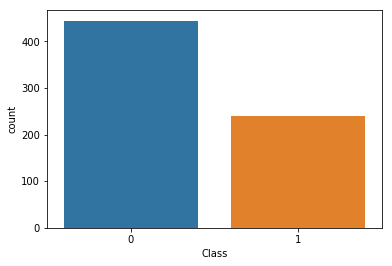

0    444
1    239
Name: Class, dtype: int64


In [19]:
sns.countplot(labels)
plt.show()
print(labels.value_counts())

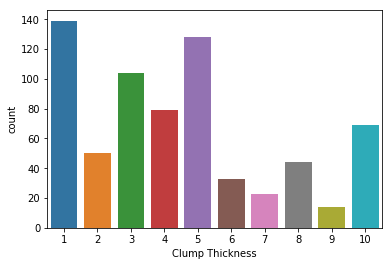

1     139
5     128
3     104
4      79
10     69
2      50
8      44
6      33
7      23
9      14
Name: Clump Thickness, dtype: int64


In [20]:
sns.countplot(data_clean2.iloc[:,1])
plt.show()
print(data_clean2.iloc[:,1].value_counts())

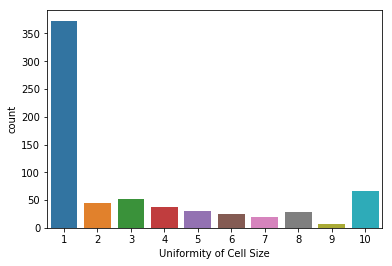

1     373
10     67
3      52
2      45
4      38
5      30
8      28
6      25
7      19
9       6
Name: Uniformity of Cell Size, dtype: int64


In [21]:
sns.countplot(data_clean2.iloc[:,2])
plt.show()
print(data_clean2.iloc[:,2].value_counts())

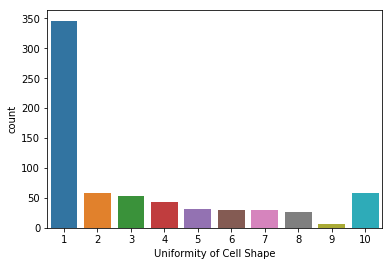

1     346
10     58
2      58
3      53
4      43
5      32
7      30
6      29
8      27
9       7
Name: Uniformity of Cell Shape, dtype: int64


In [22]:
sns.countplot(data_clean2.iloc[:,3])
plt.show()
print(data_clean2.iloc[:,3].value_counts())

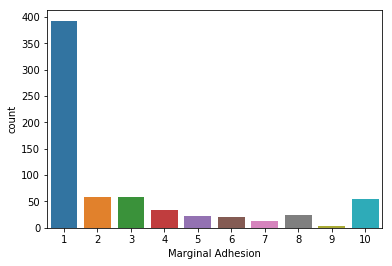

1     393
3      58
2      58
10     55
4      33
8      25
5      23
6      21
7      13
9       4
Name: Marginal Adhesion, dtype: int64


In [23]:
sns.countplot(data_clean2.iloc[:,4])
plt.show()
print(data_clean2.iloc[:,4].value_counts())

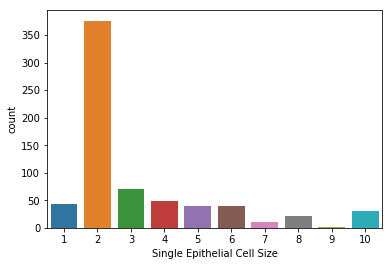

2     376
3      71
4      48
1      44
6      40
5      39
10     31
8      21
7      11
9       2
Name: Single Epithelial Cell Size, dtype: int64


In [24]:
sns.countplot(data_clean2.iloc[:,5])
plt.show()
print(data_clean2.iloc[:,5].value_counts())

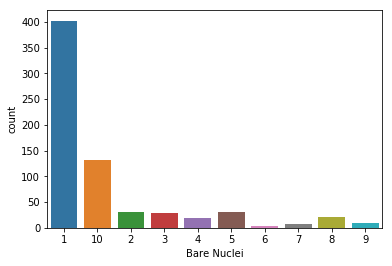

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64


In [25]:
sns.countplot(data_clean2.iloc[:,6])
plt.show()
print(data_clean2.iloc[:,6].value_counts())

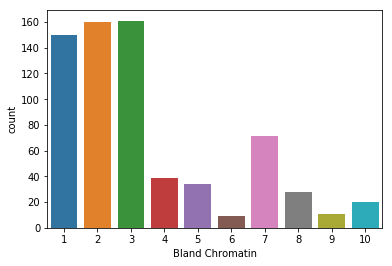

3     161
2     160
1     150
7      71
4      39
5      34
8      28
10     20
9      11
6       9
Name: Bland Chromatin, dtype: int64


In [26]:
sns.countplot(data_clean2.iloc[:,7])
plt.show()
print(data_clean2.iloc[:,7].value_counts())

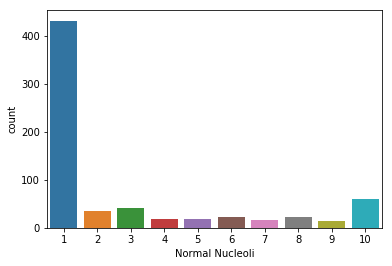

1     432
10     60
3      42
2      36
8      23
6      22
5      19
4      18
7      16
9      15
Name: Normal Nucleoli, dtype: int64


In [27]:
sns.countplot(data_clean2.iloc[:,8])
plt.show()
print(data_clean2.iloc[:,8].value_counts())

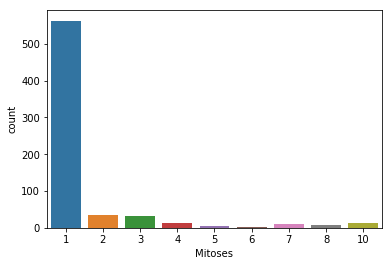

1     563
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64


In [28]:
sns.countplot(data_clean2.iloc[:,9])
plt.show()
print(data_clean2.iloc[:,9].value_counts())

### violin plot
A violin shows the distribution of data at each features for both two classes.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

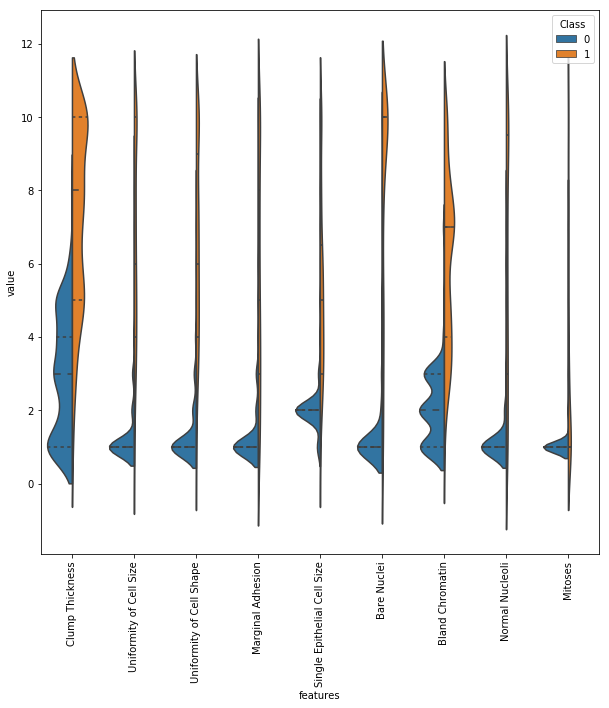

In [29]:
# first ten features
data = train.astype(float)
#data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([labels,data],axis=1)
data = pd.melt(data,id_vars="Class",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Class", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

From this plot, I can get some rough ideas about the features in the classification model if I need to select the features (or I can know which features may be more important if I use them all). The distribution of Clump Thickness and Bare Nuclei showed largest difference between two categories. 

I also try to make a swarm plot here. In the swam plot, it looks like all features have a different distribution between two categories.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

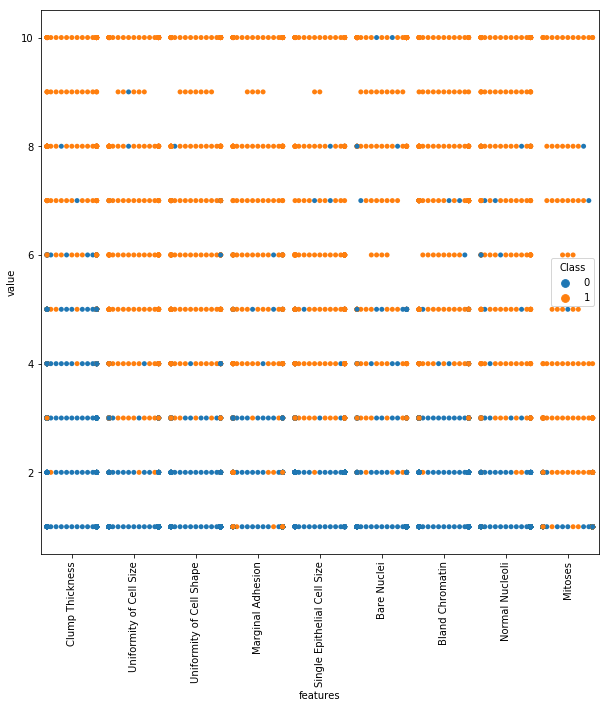

In [30]:
data = train.astype(float)
data = pd.concat([labels,data],axis=1)
data = pd.melt(data,id_vars="Class",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="Class", data=data)

plt.xticks(rotation=90)

### Check the correlation of two features
As a data scientit who has no medical background, I may naively think "Uniformity of Cell Size" and "Uniformity of Cell Shape" are correlated with each other since they show similar distribution in previous figure. So let me check if it is true.

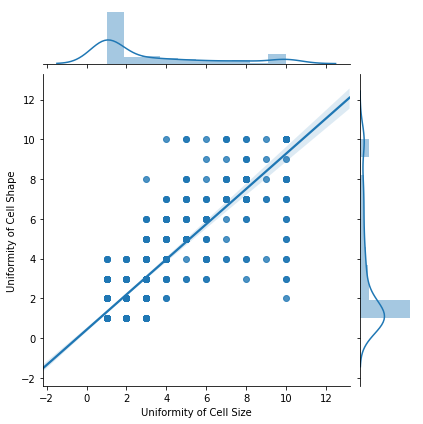

In [31]:
sns.jointplot(train.loc[:,'Uniformity of Cell Size'], train.loc[:,'Uniformity of Cell Shape'], kind="regg")

OK. It looks like they are not correlated with each other. This convince me again that I should use all 9 features in my model.

## 2. Logistic Model
Now I would like to build a logistic model in TensorFlow to predict if a cell sample is cancerous based on 9 features. 

In [35]:
#Creat placeholders
def create_placeholders():
    X = tf.placeholder(tf.float32, shape = (None, 9))
    Y = tf.placeholder(tf.float32, shape = (None, 1))
    return X, Y

In [36]:
X, Y = create_placeholders()
print("X = " + str(X))
print("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(?, 9), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)


In [37]:
# initialize parameters
def initialize_parameters():
   
    tf.set_random_seed(1)
    W = tf.Variable(tf.zeros([9,1]))
    b = tf.Variable(tf.zeros([1,1]))
    
    parameters = {"W": W,
                  "b": b}
    return parameters

In [38]:
# test the parameters 
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W = ", parameters["W"])
    print("b = ", parameters["b"])

W =  <tf.Variable 'Variable:0' shape=(9, 1) dtype=float32_ref>
b =  <tf.Variable 'Variable_1:0' shape=(1, 1) dtype=float32_ref>


In [39]:
# forward propagation function
def forward_propagation(X, parameters):
    W = parameters["W"]
    b = parameters["b"]
    
    Z = tf.matmul(X, W) + b
    return Z

In [40]:
# cost computation function, the activation function is sigmoid here
def compute_cost(Z, Y):
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = Z, labels = Y))
    return cost

In [41]:
# model function, model parameters are saved for later prediction use
def model(X_train, Y_train, X_validation, Y_validation, learning_rate = 1e-4,
          num_epochs = 100, minibatch_size = 64, print_cost = True):

    tf.reset_default_graph()
    tf.set_random_seed(1)
    seed = 3
    
    train_costs = []
    val_costs = []
    train_accs = []
    val_accs = []
    
    X, Y = create_placeholders()
    parameters = initialize_parameters()
    Z = forward_propagation(X, parameters)
    cost = compute_cost(Z, Y)
    
    # Calculate the correct predictions
    predict_op = tf.round(tf.sigmoid(Z))
    correct_prediction = tf.equal(predict_op, Y)

    # Calculate accuracy on the data set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    saver = tf.train.Saver(tf.global_variables())
    init = tf.global_variables_initializer()
    with tf.Session() as sess:

        sess.run(init)
        for epoch in range(num_epochs):      
            _, train_cost = sess.run([optimizer,cost], feed_dict={X:train_X, Y:train_Y})
            train_costs.append(train_cost)
            val_cost = sess.run(cost, feed_dict = {X: X_validation, Y: Y_validation})
            val_costs.append(val_cost)
            train_acc = accuracy.eval({X: X_train, Y: Y_train})
            val_acc = accuracy.eval({X: X_validation, Y: Y_validation})
            train_accs.append(train_acc)
            val_accs.append(val_acc)
            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Train/Validation cost after epoch %i: %f/%f. Train/Validation Accuracy: %f/%f" 
                       % (epoch, train_cost, val_cost, train_acc, val_acc))   
        saver.save(sess, './lr_1layer/lr_1layer_'+str(learning_rate))
        return train_costs, val_costs, train_accs, val_accs

In [42]:
# Randomly split data set into train and validation by ratio of 80% and 20%
def train_validation_split(X, Y, rate = 0.2):
    seed = 0
    np.random.seed(seed)
    m = X.shape[0]
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:]
    shuffled_Y = Y[permutation,:]
    split = int(m - m * rate)
    X_train = shuffled_X[:split,:]
    Y_train = shuffled_Y[:split,:]
    X_validation = shuffled_X[split:,:]
    Y_validation = shuffled_Y[split:,:]
    return X_train, Y_train, X_validation,Y_validation

In [43]:
train_X.shape

(683, 9)

In [44]:
train_Y = np.reshape(train_Y,(len(train_Y),1))

In [45]:
train_Y.shape

(683, 1)

In [94]:
X_train,Y_train,X_validation,Y_validation = train_validation_split(train_X, train_Y, rate=0.2)
print ("number of training examples = " + str(X_train.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("number of validation examples = " + str(X_validation.shape[0]))
print ("X_validation shape: " + str(X_validation.shape))
print ("Y_valiation shape: " + str(Y_validation.shape))

number of training examples = 546
X_train shape: (546, 9)
Y_train shape: (546, 1)
number of validation examples = 137
X_validation shape: (137, 9)
Y_valiation shape: (137, 1)


In [95]:
costs, val_costs, train_accs, val_accs = model(X_train, Y_train, X_validation, Y_validation, learning_rate = 0.1, num_epochs = 2000)

Train/Validation cost after epoch 0: 0.693147/0.720672. Train/Validation Accuracy: 0.346154/0.364964
Train/Validation cost after epoch 100: 0.264783/0.225966. Train/Validation Accuracy: 0.937729/0.941606
Train/Validation cost after epoch 200: 0.214281/0.182264. Train/Validation Accuracy: 0.946886/0.956204
Train/Validation cost after epoch 300: 0.184364/0.158955. Train/Validation Accuracy: 0.954212/0.963504
Train/Validation cost after epoch 400: 0.164061/0.143846. Train/Validation Accuracy: 0.957875/0.963504
Train/Validation cost after epoch 500: 0.149432/0.133188. Train/Validation Accuracy: 0.957875/0.978102
Train/Validation cost after epoch 600: 0.138456/0.125268. Train/Validation Accuracy: 0.961538/0.978102
Train/Validation cost after epoch 700: 0.129959/0.119159. Train/Validation Accuracy: 0.963370/0.978102
Train/Validation cost after epoch 800: 0.123210/0.114314. Train/Validation Accuracy: 0.965201/0.978102
Train/Validation cost after epoch 900: 0.117737/0.110385. Train/Validation 

After running the model, I plot the cost function and prediction accuracy here

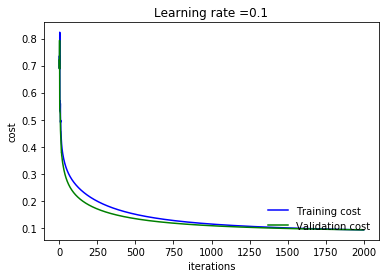

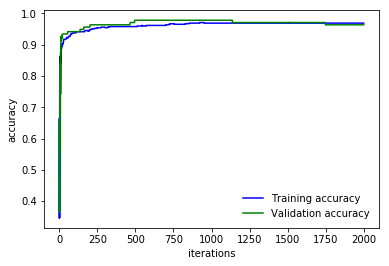

In [48]:
# plot the cost and accuracy
learning_rate = 0.1
plt.plot(np.squeeze(costs), '-b', label = 'Training cost')
plt.plot(np.squeeze(val_costs),'-g', label ='Validation cost')
plt.legend(loc = 'lower right', frameon = False)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

plt.plot(train_accs,'-b', label='Training accuracy')
plt.plot(val_accs,'-g', label='Validation accuracy')
plt.legend(loc='lower right', frameon=False)
plt.ylim
plt.ylabel('accuracy')
plt.xlabel('iterations')
plt.show()

Test preformance at different learning rate

In [49]:
train_costs = np.zeros(7)
validation_costs = np.zeros(7)
train_accuracy = np.zeros(7)
validation_accuracy = np.zeros(7)
learning_rate = np.logspace(1, -5, num=7)
for i in range(7):
    print("Training is started for learning_rate " + str(learning_rate[i]))
    costs, val_costs, train_accs, val_accs = model(X_train, Y_train, X_validation, Y_validation,
                                                   learning_rate=learning_rate[i], num_epochs = 2000, print_cost = False)
    train_costs[i] = costs[-1]
    validation_costs[i] = val_costs[-1]
    train_accuracy[i] = train_accs[-1]
    validation_accuracy[i] = val_accs[-1]
    print("Training is finished for learning_rate " + str(learning_rate[i]))

Training is started for learning_rate 10.0
Training is finished for learning_rate 10.0
Training is started for learning_rate 1.0
Training is finished for learning_rate 1.0
Training is started for learning_rate 0.1
Training is finished for learning_rate 0.1
Training is started for learning_rate 0.01
Training is finished for learning_rate 0.01
Training is started for learning_rate 0.001
Training is finished for learning_rate 0.001
Training is started for learning_rate 0.0001
Training is finished for learning_rate 0.0001
Training is started for learning_rate 1e-05
Training is finished for learning_rate 1e-05


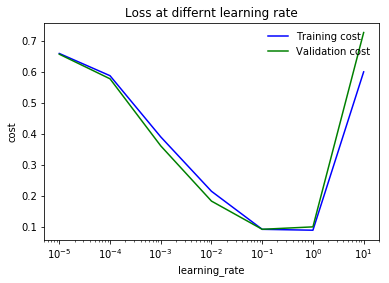

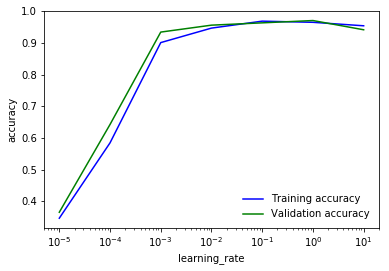

In [50]:
# plot the cost and accuracy for differnt learning rate
plt.plot(learning_rate, np.squeeze(train_costs), '-b', label = 'Training cost')
plt.plot(learning_rate, np.squeeze(validation_costs),'-g', label ='Validation cost')
plt.xscale('log')
plt.legend(loc = 'upper right', frameon = False)
plt.ylabel('cost')
plt.xlabel('learning_rate')
plt.title("Loss at differnt learning rate")
plt.show()

plt.plot(learning_rate, train_accuracy,'-b', label='Training accuracy')
plt.plot(learning_rate, validation_accuracy,'-g', label='Validation accuracy')
plt.xscale('log')
plt.legend(loc='lower right', frameon=False)
plt.ylabel('accuracy')
plt.xlabel('learning_rate')
plt.show()

It looks like the learning rate (0.1) I choose at first is good enough! Lucky!

Now let me check the parameters in the saved model

In [64]:
# Load saved model for learning rate = 0.1 and make predictions for validation data set 
# (Here only Y_scores are output because we need to make ROC curve later)
# Y_predict can be calculated by np.round(Y_scores)
tf.reset_default_graph()

X, Y = create_placeholders()
parameters = initialize_parameters()
Z = forward_propagation(X, parameters)
# Calculate the predicted probabilities
predict_op = tf.sigmoid(Z)
saver = tf.train.Saver()
with tf.Session() as sess1:
    saver.restore(sess1,'./lr_1layer/lr_1layer_0.1')
    W,b = sess1.run(tf.all_variables())
    Y_scores = sess1.run(predict_op, feed_dict = {X: X_validation})

INFO:tensorflow:Restoring parameters from ./lr_1layer/lr_1layer_0.1


In [65]:
W

array([[ 0.22357956],
       [ 0.20065327],
       [ 0.2578529 ],
       [ 0.1682994 ],
       [-0.06525566],
       [ 0.3502787 ],
       [ 0.15065235],
       [ 0.19544898],
       [ 0.17989945]], dtype=float32)

In [66]:
b

array([[-5.974654]], dtype=float32)

The parameters for feature "Clump Thickness", "Uniformity of Cell Shape","Bare Nuclei" are larger than others. The parameter for "Single Epithelial Cell Size" are smallest.

## 3. Validation
### Confusion Matrix
let me plot the confusion matrix here to see the validation results

In [73]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import re
import textwrap
import itertools
def plot_confusion_matrix(cm, labels):
    '''
    :param cm: A confusion matrix: A square ```numpy array``` of the same size as self.labels
    :return:  A ``matplotlib.figure.Figure`` object with a numerical and graphical representation of the cm array
    '''
    numClasses = len(labels)
    
    fig = Figure(figsize=(numClasses, numClasses), dpi=100, facecolor='w', edgecolor='k')
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(cm, cmap='Oranges')

    classes = [re.sub(r'([a-z](?=[A-Z])|[A-Z](?=[A-Z][a-z]))', r'\1 ', x) for x in labels]
    classes = ['\n'.join(textwrap.wrap(l, 20)) for l in classes]

    tick_marks = np.arange(len(classes))

    ax.set_xlabel('Predicted')
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=-90, ha='center')
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    ax.set_ylabel('True Label')
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes, va='center')
    ax.yaxis.set_label_position('left')
    ax.yaxis.tick_left()

    for i, j in itertools.product(range(numClasses), range(numClasses)):
        ax.text(j, i, int(cm[i, j]) if cm[i, j] != 0 else '.', horizontalalignment="center", verticalalignment='center', color="black")
    fig.set_tight_layout(True)
    return fig

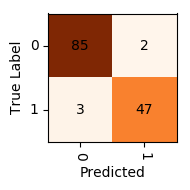

In [74]:
from sklearn.metrics import confusion_matrix
Y_predict = np.round(Y_scores)
cm = confusion_matrix(Y_validation, Y_predict)
labels = ["0","1"]
fig = plot_confusion_matrix(cm,labels)
fig

From the Confusion Matrix, I can find that the Precision is 0.96 and the Recall is 0.94.

0.995


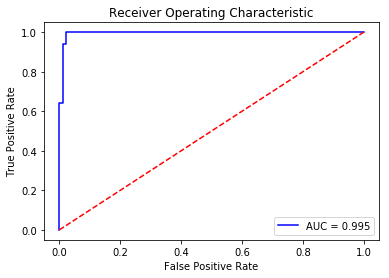

In [80]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_validation,Y_scores)
roc_auc=auc(fpr, tpr)
print("%0.3f" % roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
fpr

array([0.        , 0.        , 0.        , 0.01149425, 0.01149425,
       0.02298851, 0.02298851, 0.20689655, 0.22988506, 0.33333333,
       0.35632184, 0.4137931 , 0.45977011, 0.47126437, 0.50574713,
       0.51724138, 0.56321839, 0.62068966, 0.64367816, 0.66666667,
       0.70114943, 0.73563218, 0.7816092 , 0.79310345, 0.83908046,
       0.87356322, 0.88505747, 0.94252874, 0.95402299, 1.        ])

In [85]:
tpr

array([0.  , 0.02, 0.64, 0.64, 0.94, 0.94, 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [86]:
thresholds

array([1.9999409 , 0.9999409 , 0.96607155, 0.9458209 , 0.5903344 ,
       0.54784775, 0.30390972, 0.0543964 , 0.05093025, 0.04049531,
       0.03981516, 0.03317618, 0.03209426, 0.03077156, 0.02976565,
       0.02896391, 0.02773023, 0.02254713, 0.0222984 , 0.0198165 ,
       0.0192399 , 0.01822403, 0.01777652, 0.01715859, 0.01667226,
       0.01544474, 0.01532852, 0.01437411, 0.01374875, 0.01238874],
      dtype=float32)

From the ROC curve, I can find that if I lower the threshold from 0.5 to ~0.3, we can get a high True Positive Rate of 1. and a low False Positive Rate 0.02. Then the model doesn't miss any true cancerous cell samples which is important in medical decision.

## 4. Summary
In this report, I used a logistic regression model to predict if a cell sample is cancerous by its 9 features. The model works with a accuracy of 96.4%.